# Simple Linear Regression

## Importing the libraries

In [148]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

## Importing the dataset

In [149]:
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Checking for missing values

In [150]:
dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## Checking distribution and relationships

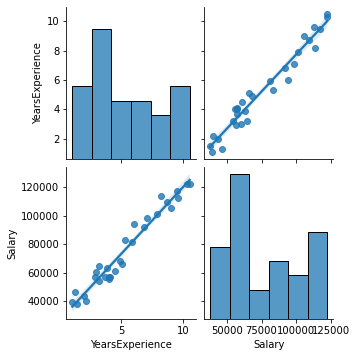

In [151]:
sns.pairplot(dataset,
             palette = "Set2",
             kind = 'reg',
             height = 2.5)

## Lookin at the model on the whole data set

In [159]:
import statsmodels.api as sm
df_X = dataset.drop(['Salary'], axis = 1)
df_X = sm.add_constant(df_X)
df_Y = dataset['Salary']
model = sm.OLS(df_Y, df_X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        18:19:59   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

#### We can a very strong relationship between Salary and Years of experience (adj R-squared = 0.955). Every years of experience will increase your salary by aroud 9500 dollars. So keep working !

# Let try to predict salary with years of experience

## Spliting dependent and independent variables

In [152]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [154]:
print(y_train)

[112635.  81363.  54445. 101302.  66029.  83088. 105582.  39891.  67938.
  91738.  61111.  57189.  63218.  57081.  98273.  93940.  46205.  37731.
  39343.  56642.]


## Training the Simple Linear Regression model on the Training set

In [155]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [156]:
y_pred = regressor.predict(X_test)
print(y_pred)

[114476.76003132  63292.16850531 121921.79152601 123783.04939969
 102378.58385244  44679.58976857  53985.87913694  55847.13701061
 107031.72853663  63292.16850531]


## Visualising the relationship in the Training set

In [158]:
df_train = pd.DataFrame({"Years of Experience" : X_train.flatten(),
                         "Salary" : y_train})
fig = px.scatter(df_train, x = "Years of Experience",
                 y = "Salary", 
                 #marginal_x="histogram",
                 #marginal_y="histogram",
                 trendline="ols",
                 trendline_color_override="#BC5E21",
                 color_discrete_sequence=["#749CA8"],
                 template = "simple_white")


fig.update_layout(
    legend=dict(
        x=.01,
        y=.98,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="Black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="dimgray",
        borderwidth=2
    ))

# retrieve model estimates
model = px.get_trendline_results(fig)
alpha = model.iloc[0]["px_fit_results"].params[0]
beta = model.iloc[0]["px_fit_results"].params[1]

# restyle figure
fig.data[0].name = 'observations'
fig.data[0].showlegend = True
fig.data[1].name = fig.data[1].name  + ' y = ' + str(round(alpha, 2)) + ' + ' + str(round(beta, 2)) + 'x'
fig.data[1].showlegend = True

# addition for r-squared
rsq = model.iloc[0]["px_fit_results"].rsquared
fig.add_trace(go.Scatter(x=[0], y=[0],
                         name = "R-squared" + ' = ' + str(round(rsq, 2)),
                         showlegend=True,
                         mode='markers',
                         marker=dict(color='rgba(0,0,0,0)')
                         ))

fig.show()

results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     301.7
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.08e-12
Time:                        18:17:23   Log-Likelihood:                -200.44
No. Observations:                  20   AIC:                             404.9
Df Residuals:                      18   BIC:                             406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.607e+04   2874.729      9.068      0.000       2e+04    3.21e+04
x1          9306.2894    535.795     17.369      0.000    8180.626    1.04e+04
==============================================================================
Omnibus:                        1.132   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.568   Jarque-Bera (JB):                1.042
Skew:                           0.446   Prob(JB):                        0.594
Kurtosis:                       2.325   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We see a very close relationship between years of experience and salary. Our model/predictions (the line) are very close from the training data. The linear model we build is very likely to predict salary from years of experience very well using new data that wasn't used to build the model. We will investigate how well our model does this by looking at the test data. 

## For simpler plot 

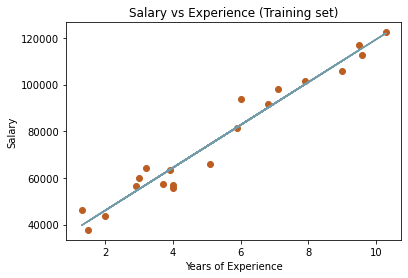

In [117]:
plt.scatter(X_train, y_train, color = '#BC5E21')
plt.plot(X_train, regressor.predict(X_train), color = '#749CA8')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualizing the relationship in the test set 

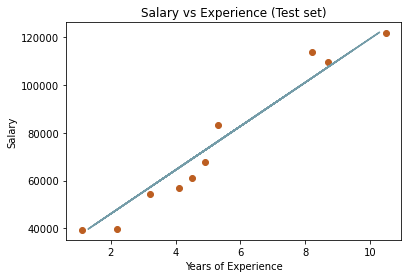

In [130]:
plt.scatter(X_test, y_test, color = '#BC5E21')
plt.plot(X_train, regressor.predict(X_train), color = '#749CA8')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### We see that our model/predictions (the blue line) is very close from the test data which is a good indication that the model performs well at predicting salary from years of experience. We can test this more formally.

## Diadnostic of predictions compared to actual data

In [115]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 40071705.38


In [116]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.95


In [122]:
df_diag = pd.DataFrame({"Predicted Salary" : y_pred,
                         "Actual Salary" : y_test})
fig = px.scatter(df_diag, x = "Predicted Salary",
                 y = "Actual Salary", 
                 #marginal_x="histogram",
                 #marginal_y="histogram",
                 trendline="ols",
                 trendline_color_override="#BC5E21",
                 color_discrete_sequence=["#749CA8"],
                 template = "simple_white")


fig.update_layout(
    legend=dict(
        x=.01,
        y=.98,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="Black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="dimgray",
        borderwidth=2
    ))

# retrieve model estimates
model = px.get_trendline_results(fig)
alpha = model.iloc[0]["px_fit_results"].params[0]
beta = model.iloc[0]["px_fit_results"].params[1]

# restyle figure
fig.data[0].name = 'observations'
fig.data[0].showlegend = True
fig.data[1].name = fig.data[1].name  + ' y = ' + str(round(alpha, 2)) + ' + ' + str(round(beta, 2)) + 'x'
fig.data[1].showlegend = True

# addition for r-squared
rsq = model.iloc[0]["px_fit_results"].rsquared
fig.add_trace(go.Scatter(x=[0], y=[0],
                         name = "R-squared" + ' = ' + str(round(rsq, 2)),
                         showlegend=True,
                         mode='markers',
                         marker=dict(color='rgba(0,0,0,0)')
                         ))

fig.show()

results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


/home/louis/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     200.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           6.05e-07
Time:                        17:14:25   Log-Likelihood:                -100.66
No. Observations:                  10   AIC:                             205.3
Df Residuals:                       8   BIC:                             205.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8464.7110   6219.719     -1.361      0.211   -2.28e+04    5877.987
x1             1.0955      0.077     14.150      0.000       0.917       1.274
==============================================================================
Omnibus:                        2.110   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.148
Skew:                           0.530   Prob(JB):                        0.563
Kurtosis:                       1.722   Cond. No.                     2.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Here we see that the salary prediction for the test set are very close from the actual data and from the perfect prediction which would be the blue line. Our model is perfoming very well ! 

## For a simpler plot

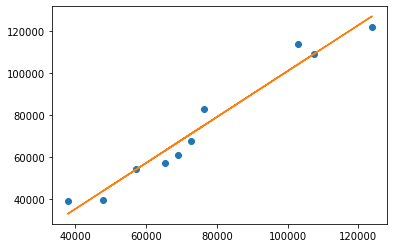

In [127]:
plt.plot(y_pred, y_test, "o")
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, m*y_pred + b)